In [1]:
!pip install google-cloud-bigquery
!pip install db-dtypes

In [12]:
import pandas as pd
import glob
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
import seaborn as sns

In [3]:
# 파이썬 구글 빅쿼리 연동 코드
# json 파일

key_path = glob.glob("*.json")[0]
credentials = service_account.Credentials.from_service_account_file(key_path)
client = bigquery.Client(credentials = credentials, 
                         project = credentials.project_id)

In [4]:
# sql 추출 및 데이터 프레임 변환

def sql_to_dataframe(sql:str) -> pd.DataFrame:
    """
    Args:
        sql (str): sql for extraction

    Returns:
        pd.DataFrame: extract data with sql
    """
    query_job = client.query(sql)
    df = query_job.to_dataframe()
    return df

In [5]:
# 데이터 불러오기

sql = """
SELECT
  *
FROM `rfm-analysis-392707.rfm_analysis.rfm_analysis`
"""
df = sql_to_dataframe(sql)
df

,Order_Date,Row_ID,Order_ID,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,2020-07-11,6231,CA-2017-127656,Standard Class,NW-18400,Consumer,United States,Waterloo,Iowa,50701,Central,OFF-AR-10001166,Office Supplies,Art,Staples in misc. colors,30.32,4,0.0,11.8248
1,2020-01-29,9915,CA-2017-160927,Second Class,TM-21010,Consumer,United States,Marion,Iowa,52302,Central,OFF-PA-10003848,Office Supplies,Paper,Xerox 1997,12.96,2,0.0,6.2208
2,2020-01-29,9916,CA-2017-160927,Second Class,TM-21010,Consumer,United States,Marion,Iowa,52302,Central,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,94.85,5,0.0,45.5280
3,2020-01-29,9917,CA-2017-160927,Second Class,TM-21010,Consumer,United States,Marion,Iowa,52302,Central,OFF-ST-10001590,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,13.48,1,0.0,3.5048
4,2020-01-29,9918,CA-2017-160927,Second Class,TM-21010,Consumer,United States,Marion,Iowa,52302,Central,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",14.91,3,0.0,4.6221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-09-09,2400,CA-2017-147361,Standard Class,SB-20290,Corporate,United States,Florence,South Carolina,29501,South,OFF-ST-10001809,Office Supplies,Storage,Fellowes Officeware Wire Shelving,628.81,7,0.0,12.5762
3308,2020-09-09,2401,CA-2017-147361,Standard Class,SB-20290,Corporate,United States,Florence,South Carolina,29501,South,OFF-ST-10002214,Office Supplies,Storage,X-Rack File for Hanging Folders,56.45,5,0.0,14.6770
3309,2020-12-10,6909,US-2017-135503,Standard Class,JE-16165,Corporate,United States,North Charleston,South Carolina,29406,South,FUR-FU-10002364,Furniture,Furnishings,"Eldon Expressions Wood Desk Accessories, Oak",14.76,2,0.0,4.2804
3310,2020-01-12,1846,US-2017-158512,Second Class,DA-13450,Home Office,United States,Washington,District of Columbia,20016,East,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,40.08,6,0.0,19.2384


In [22]:
print("총 행 개수: {}".format(len(df)))
print("최소 날짜: {}".format(min(df["Order_Date"])))
print("최대 날짜: {}".format(max(df["Order_Date"])))
print("고유 고객: {}명".format(df["Customer_ID"].nunique()))
print("카테고리명: {}".format(df["Category"].unique()))
print("서브 카테고리 개수: {}".format(df["Sub_Category"].nunique()))
print("고객별 최소 구매 이력 횟수: {}".format(min(df.groupby(["Customer_ID"]).agg({"Order_ID":"count"})["Order_ID"].unique())))
print("고객별 최대 구매 이력 횟수: {}".format(max(df.groupby(["Customer_ID"]).agg({"Order_ID":"count"})["Order_ID"].unique())))

총 행 개수: 3312
최소 날짜: 2020-01-01
최대 날짜: 2020-12-30
고유 고객: 693명
카테고리명: ['Office Supplies' 'Furniture' 'Technology']
서브 카테고리 개수: 17
고객별 최소 구매 이력 횟수: 1
고객별 최대 구매 이력 횟수: 20


In [11]:
df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,3312.0,3312.0,3312.000000,3312.0,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.0,1841.0,0.444000,1.0,0.000000,-3839.990400
25%,2655.75,27978.75,17.018000,2.0,0.000000,1.763200
50%,5183.5,60472.5,53.810000,3.0,0.200000,8.296800
75%,7498.25,90032.0,205.105700,5.0,0.200000,28.315125
max,9994.0,99301.0,13999.960000,14.0,0.800000,6719.980800


* 판매 금액이 13999.96이 최대값임.
* 3분위수가 205.105700인 반면 너무 큰 값 - 확인 해 볼 필요가 있음.
* 14개를 구매한 고객이 있음. 최대 가격은 14개를 구매한 고객일까?
* 할인은 0~0.8까지 적용됨.
* 순이익은 -3839 ~ 6719로 넓게 분포하고 있음.

<Axes: xlabel='Quantity', ylabel='Sales'>

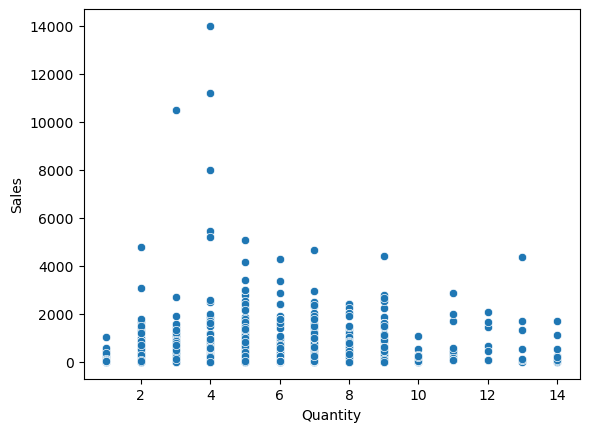

In [23]:
sns.scatterplot(x= df["Quantity"],y = df["Sales"])

* 4개를 구매한 고객이 최대 구매 금액을 보이고 있음.

In [24]:
df.loc[df["Sales"] > 13000,]

,Order_Date,Row_ID,Order_ID,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
2824,2020-03-23,8154,CA-2017-140151,First Class,RB-19360,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808


* 복사기를 샀음. 어쩌면 합당한 가격일지도? - 상품 아이디 TEC-CO-10004722
* 복사기를 구매한 고객들을 살펴볼 필요가 있음.

In [31]:
df.loc[(df["Sub_Category"] == "Copiers") & (df["Product_ID"] == "TEC-CO-10004722"),]

,Order_Date,Row_ID,Order_ID,Ship_Mode,Customer_ID,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
1001,2020-11-17,4191,CA-2017-166709,Standard Class,HL-15040,Consumer,United States,Newark,Delaware,19711,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970,3,0.0,5039.9856
1569,2020-10-22,2624,CA-2017-127180,First Class,TA-21385,Home Office,United States,New York City,New York,10024,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968,4,0.2,3919.9888
2824,2020-03-23,8154,CA-2017-140151,First Class,RB-19360,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960,4,0.0,6719.9808


* 구매금액이 10000을 넘어가는 고객들 모두 같은 제품을 샀음. - 이상값은 아님!